<a href="https://colab.research.google.com/github/cly1213/Colab/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
from keras.datasets import mnist
from keras.utils import np_utils

import numpy as np
np.random.seed(10)
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train.shape={}, y_train.shape={}".format(X_train.shape, y_train.shape))

print("X_test.shape={}, y_test.shape={}".format(X_test.shape, y_test.shape))

11493376/11490434 [==============================] - 0s 0us/step
X_train.shape=(60000, 28, 28), y_train.shape=(60000,)
X_test.shape=(10000, 28, 28), y_test.shape=(10000,)


In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')

X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

print("X_train.shape={}".format(X_train.shape))

print("X_test.shape={}".format(X_test.shape))

X_train.shape=(60000, 28, 28, 1)
X_test.shape=(10000, 28, 28, 1)


In [0]:
X_train = X_train / 255

X_test = X_test / 255

In [0]:
y_train = np_utils.to_categorical(y_train)

y_test_categories = y_test

y_test = np_utils.to_categorical(y_test)

In [0]:
from keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='same', input_shape=(28, 28, 1), activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
model.add(Conv2D(filters=36, kernel_size=(5, 5), padding='same', activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
model.add(Dropout(0.25))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(128, activation='relu'))

In [0]:
model.add(Dropout(0.5))

In [0]:
model.add(Dense(10, activation='softmax'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        6416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 36)          14436     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 36)          0         
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [25]:
train_history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), validation_split=0.2, epochs=10, batch_size=300, verbose=2)

W0724 14:51:23.687901 140480943544192 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 10s - loss: 0.6297 - acc: 0.7942 - val_loss: 0.0773 - val_acc: 0.9752
Epoch 2/10
 - 2s - loss: 0.1540 - acc: 0.9534 - val_loss: 0.0556 - val_acc: 0.9831
Epoch 3/10
 - 2s - loss: 0.1119 - acc: 0.9675 - val_loss: 0.0426 - val_acc: 0.9875
Epoch 4/10
 - 2s - loss: 0.0908 - acc: 0.9731 - val_loss: 0.0360 - val_acc: 0.9890
Epoch 5/10
 - 2s - loss: 0.0781 - acc: 0.9765 - val_loss: 0.0346 - val_acc: 0.9901
Epoch 6/10
 - 2s - loss: 0.0703 - acc: 0.9790 - val_loss: 0.0301 - val_acc: 0.9906
Epoch 7/10
 - 2s - loss: 0.0640 - acc: 0.9812 - val_loss: 0.0248 - val_acc: 0.9925
Epoch 8/10
 - 2s - loss: 0.0590 - acc: 0.9823 - val_loss: 0.0264 - val_acc: 0.9918
Epoch 9/10
 - 2s - loss: 0.0528 - acc: 0.9847 - val_loss: 0.0240 - val_acc: 0.9923
Epoch 10/10
 - 2s - loss: 0.0506 - acc: 0.9845 - val_loss: 0.0242 - val_acc: 0.9923


In [0]:
def show_train_history(train_history, train, validation):

    plt.plot(train_history.history[train])

    plt.plot(train_history.history[validation])

    plt.title('Train History')

    plt.ylabel('train')

    plt.xlabel('Epoch')

    plt.legend(['train', 'validation'], loc='center right')

    plt.show()



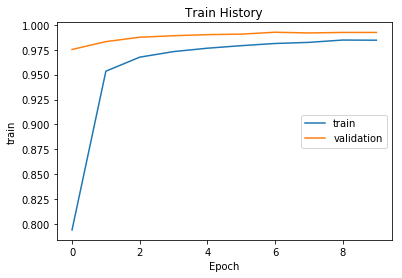

In [28]:
show_train_history(train_history, 'acc','val_acc')

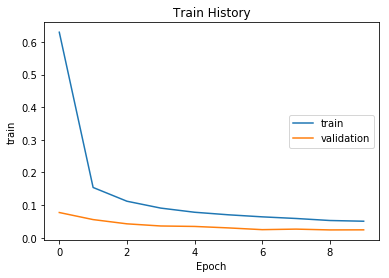

In [29]:
show_train_history(train_history, 'loss','val_loss')

In [30]:
scores = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 65us/step


In [31]:
scores[1]

0.9923

In [32]:
import pandas as pd

prediction = model.predict_classes(X_test)

print(y_test.shape)

pd.crosstab(y_test_categories, prediction, rownames=['label'], colnames=['predict'])

(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,978,0,0,0,0,0,0,1,1,0
1,0,1129,1,2,0,1,0,2,0,0
2,1,1,1028,0,0,0,0,2,0,0
3,0,0,1,1006,0,2,0,1,0,0
4,0,0,0,0,980,0,0,0,0,2
5,2,0,0,7,0,881,1,1,0,0
6,5,2,1,0,2,2,946,0,0,0
7,0,3,5,0,0,0,0,1019,1,0
8,2,1,1,2,2,1,0,1,963,1
